# Kaggle Titanic Challenge - Machine Learning from Disaster
- Solution done by Mos Daniele
- Version 0.1

![Titanic art](https://bookpalace.com/acatalog/CotonTitanic.jpg)

In [235]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Load the data

In [236]:
# Fetching the data
train_data = pd.read_csv("sample_data/train.csv")
test_data = pd.read_csv("sample_data/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
# Fill in the missing values
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

## Visualize the data

In [239]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [240]:
train_data.shape

(891, 12)

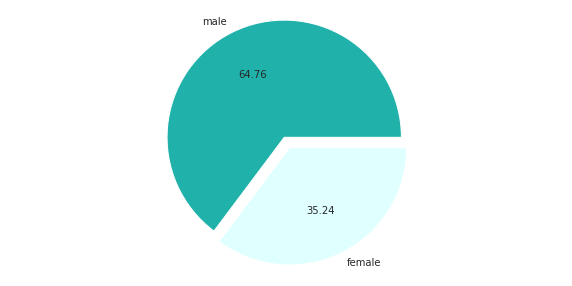

In [241]:
# See data related to the sex of the passengers

colors = ['lightseagreen', 'lightcyan']
labels = ['male', 'female']
values = []
explode = (0, 0.1)

values.append(train_data['Sex'].value_counts()['male'])
values.append(train_data['Sex'].value_counts()['female'])

fig = plt.figure(figsize = (10, 5))

plt.pie(values, 
        labels=labels, 
        colors=colors, 
        autopct='%.2f',
        explode=explode)
plt.axis('equal')
plt.show()

No handles with labels found to put in legend.


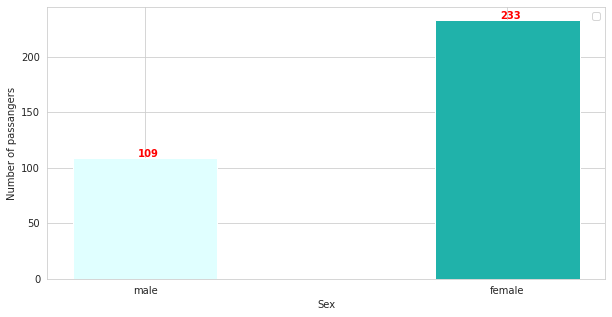

In [242]:
# Display number of passengers based on sex

colors = ['lightseagreen', 'lightcyan']
labels = ['male', 'female']
values = []

values.append(len(train_data.loc[(train_data['Survived'] == 1) & (train_data['Sex'] == 'male')]))
values.append(len(train_data.loc[(train_data['Survived'] == 1) & (train_data['Sex'] == 'female')]))

fig = plt.figure(figsize = (10, 5))

plt.bar(labels[0], values[0], color='lightcyan', width = 0.4)
plt.bar(labels[1], values[1], color='lightseagreen', width = 0.4)
plt.xlabel('Sex')
plt.ylabel('Number of passangers')
plt.legend(loc='best')
for i, v in enumerate(values):
    plt.text(x=i-0.02, y=v+1, s=str(v), color='red', fontweight='bold')

plt.show()

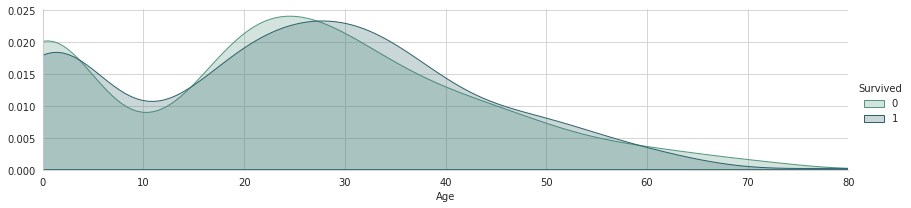

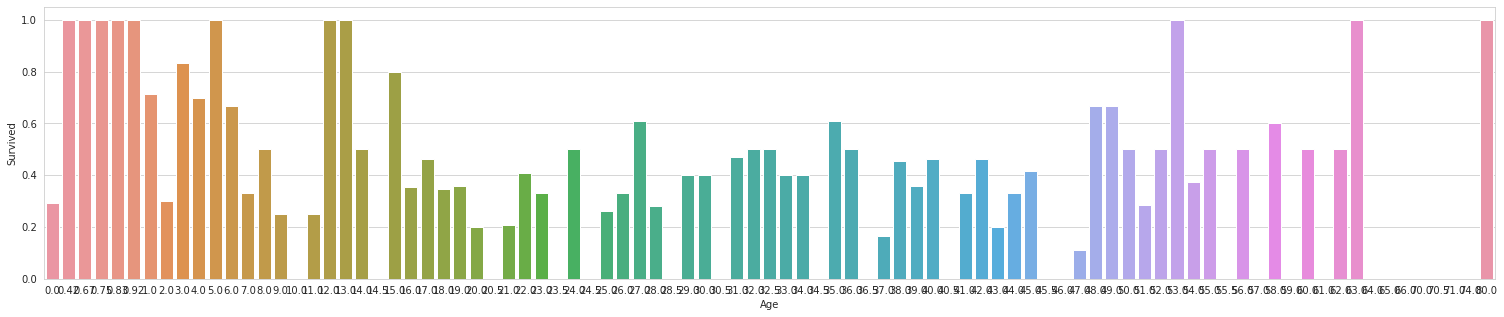

In [243]:
# Display median age value related to passengers survivability

# Using seaborn library
pal = sns.cubehelix_palette(3, rot=-.5, light=.5)
figure = sns.FacetGrid(train_data, hue="Survived", aspect=4, palette=pal)
figure.map(sns.kdeplot, 'Age', shade= True)
figure.set(xlim=(0, train_data['Age'].max()))
figure.add_legend()

ax = plt.subplots(1, 1, figsize = (26, 5))
age_avg = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=age_avg)

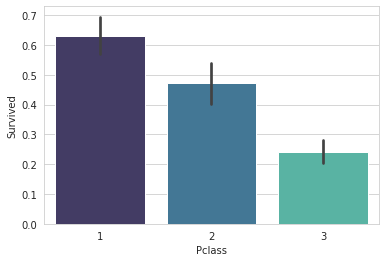

In [244]:
# Comparing Pclass values

sns.barplot(x='Pclass', y='Survived', palette="mako", data=train_data)

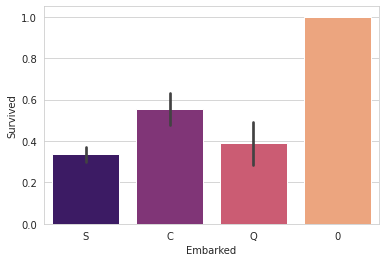

In [245]:
# Analizing embarking data
# the value '0' is signaling empty value

sns.barplot(x='Embarked', y='Survived', palette='magma', data=train_data)

Text(0.5, 1, 'Survivability related to passengers data')

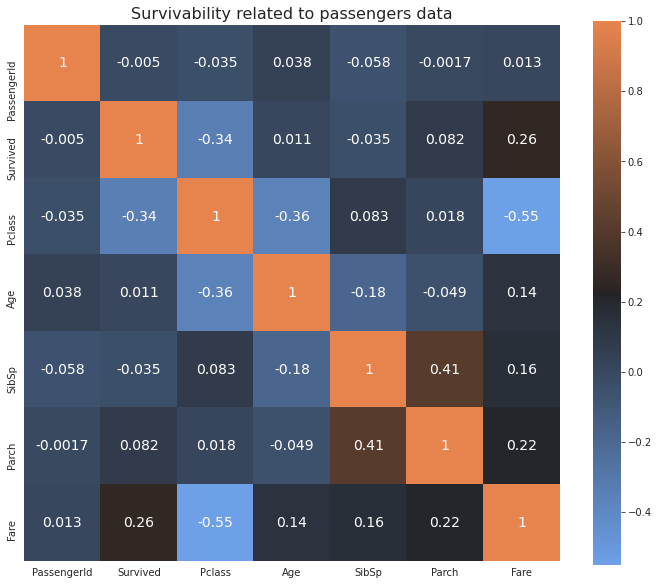

In [246]:
# Display corentions between passengers features and the survivability
fig , ax = plt.subplots(figsize =(12, 10))
colormap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Compute pairwise correlation of columns
fig = sns.heatmap(
      train_data.corr(), 
      cmap = colormap,
      ax=ax,
      annot=True, 
      square=True, 
      annot_kws={'fontsize':14})
    
plt.title('Survivability related to passengers data', y=1, size=16)

## Replace values and remodel the data

In [247]:
# Get the null values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [248]:
# Display data types of columns
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [249]:
# Replace the male and female strings with integer values

train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

In [250]:
# Replace Embarked string indices with integer ones
train_data['Embarked'] = train_data['Embarked'].fillna(0)
train_data['Embarked'] = train_data['Embarked'].map({'S':1, 'C':2, 'Q':3, 0:0})
test_data['Embarked'] = test_data['Embarked'].fillna(0)
test_data['Embarked'] = test_data['Embarked'].map({'S':1, 'C':2, 'Q':3, 0:0})

In [251]:
# Droping redundant columns
X_train = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y_train = train_data['Survived']
test_Id = test_data['PassengerId']
X_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## Fitting models
* trying out ML algorithms
* determine which one fits the needs of our problem

In [252]:
# Imports
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Using Sklearn ML algorithms

In [253]:
score_tracker = {}

In [254]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
accuracy = round(lr.score(X_train, Y_train) * 100, 2)
score_tracker['linear regression'] = accuracy
accuracy

38.37

In [255]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
accuracy = round(sgd.score(X_train, Y_train) * 100, 2)
score_tracker['sgd'] = accuracy
accuracy

53.87

In [267]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
accuracy = round(dt.score(X_train, Y_train) * 100, 2)
score_tracker['decision tree'] = accuracy
accuracy

98.2

In [257]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svm = svc.predict(X_test)
accuracy = round(svc.score(X_train, Y_train) * 100, 2)
score_tracker['svm'] = accuracy
accuracy

68.8

In [268]:
# K-Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy = round(knn.score(X_train, Y_train) * 100, 2)
score_tracker['knn'] = accuracy
accuracy

83.84

In [259]:
# Logistic Reression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_logr = lr.predict(X_test)
accuracy = round(lr.score(X_train, Y_train) * 100, 2)
score_tracker['logistic regression'] = accuracy
accuracy

79.12

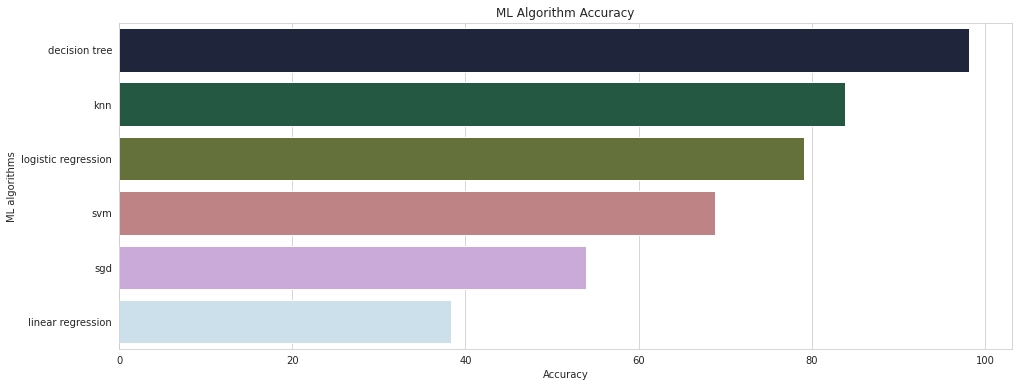

In [260]:
# Statistics regarding ML algorithm accuracy

data_dict = {'ML algorithms': score_tracker.keys(), 'Accuracy': score_tracker.values()}
data = pd.DataFrame.from_dict(data_dict)
data = pd.DataFrame.sort_values(data, by=['Accuracy'], ascending=False)
plt.figure(figsize = (16, 6))
plt.title('ML Algorithm Accuracy')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
sns.barplot(x='Accuracy', y='ML algorithms', data=data, palette='cubehelix')

## Tensorflow training tryout



In [261]:
# Imports
import tensorflow as tf

In [262]:
# Creating and training the Tensorflow model

tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr=0.01),
              metrics = ['mae'])

# Fitting the model
model.fit(X_train, Y_train, epochs = 1000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
28/28 [==============================] - 0s 2ms/step - loss: 2.4598 - mae: 2.4598
Epoch 2/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4533 - mae: 0.4533
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.4103 - mae: 0.4103
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3954 - mae: 0.3954
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3824 - mae: 0.3824
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3732 - mae: 0.3732
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.3714 - mae: 0.3714
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3620 - mae: 0.3620
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3602 - mae: 0.3602
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3536 - mae: 0.3536
Epoch 11/1000
28/28 [============================

In [263]:
Y_pred_tf = model.predict(X_test)
accuracy = round(lr.score(X_train, Y_train) * 100, 2)
accuracy

79.12

### Writting the submissions for Kaggle

In [269]:
submission_data = pd.DataFrame({'PassengerId': test_Id, 'Survived': Y_pred_dt})
submission_data.to_csv('titanic.csv', index=False)